Vamos  a hacer una regresión logística con el problema de la probabilidad de incumplimiento. Para esto importamos primero la base de datos y para esto debemos de importar...

Podemos cambiar el nombre de las variables y también no visualisar toda la base

In [1]:
import pandas as pd

In [2]:
base_cred=pd.read_csv('incumplimiento.csv')

La forma de leer la base es definitivamente muy práctica ¿pero es la mejor? No sé, lo que sí sucede es que si la base es muy grande grande, entonces ésta manera de leerla no es la mejor. De hecho, leer bases grandes con el pd. no es el correcto. ¿Qué se hace en estos casos?

In [3]:
base_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Folio             10000 non-null int64
Incumplimiento    10000 non-null object
Estudiante        10000 non-null object
Saldo             10000 non-null float64
Ingreso           10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.7+ KB


In [4]:
base_cred.tail(5)
#Nada más visualiso las primeras 5 entrada

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [5]:
from matplotlib import*
from pylab import*

Jugar con los índices en python es muy divertido, ¿Como extraigo de la base solo a aquellos que son estudiantes o sólo a aquellos que incumplieron?

In [6]:
len(base_cred[base_cred.Incumplimiento=='Yes'])

333

In [7]:
incumplido=base_cred[base_cred.Incumplimiento=='Yes']

In [8]:
incumplido[incumplido.Estudiante=='No'][0:9]

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso
206,207,Yes,No,1889.599190,48956.171589
243,244,Yes,No,1964.476872,39054.589144
263,264,Yes,No,1530.353157,30003.817151
341,342,Yes,No,1642.819997,46856.947039
345,346,Yes,No,1991.649120,42133.373176
349,350,Yes,No,1550.449264,56273.513608
357,358,Yes,No,1328.892725,34710.062366
406,407,Yes,No,1700.599913,30488.983410
440,441,Yes,No,1119.097245,37224.567814


In [9]:
len(incumplido[incumplido.Estudiante=='No'])

206

In [10]:
len(incumplido[incumplido.Estudiante=='Yes'])

127

In [11]:
len(incumplido)

333

In [12]:
cumplido=base_cred[base_cred.Incumplimiento=='No']

In [13]:
len(cumplido)

9667

In [14]:
9667+333

10000

 Es decir, tenemos el siguiente resumen: 
 Del total de 10,000 el 3.33 porciento no cumplieron y el 96.67  cumplieron

In [15]:
from IPython.core.pylabtools import figsize 

Text(0,0.5,'Ingreso')

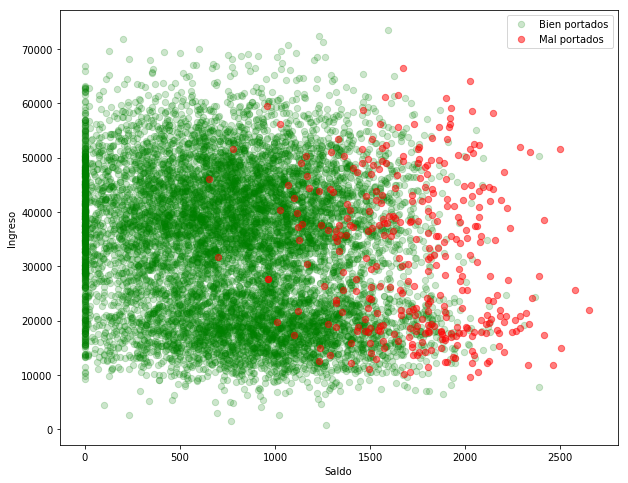

In [16]:
s1=base_cred[base_cred.Incumplimiento=='No'].Saldo
i1=base_cred[base_cred.Incumplimiento=='No'].Ingreso
s2=base_cred[base_cred.Incumplimiento=='Yes'].Saldo
i2=base_cred[base_cred.Incumplimiento=='Yes'].Ingreso

figsize(10,8)
scatter(s1,i1,marker='o',s=40,edgecolors='g',facecolors='g',alpha=0.2,label='Bien portados')
scatter(s2,i2,marker='o',s=40,edgecolors='red',facecolors='red',alpha=0.5,label='Mal portados')
legend()
xlabel('Saldo')
ylabel('Ingreso')


¿Qué intepretación le dan a la grafica anterior?
Ahora me gustaría graficar ingreso vs Incumplimiento

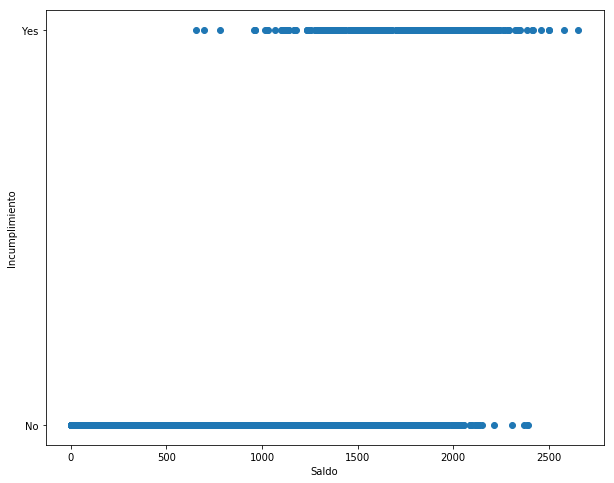

In [20]:
scatter(base_cred.Saldo,base_cred.Incumplimiento,)
xlabel('Saldo')
ylabel('Incumplimiento')
savefig('incum.pdf')

¿Qué interpretación le dan a la grafica anterior? ¿Por qué nos interesa esta gráfica?

In [21]:
import sklearn.linear_model as skl_lm

In [22]:
base_cred['In_num']=base_cred.Incumplimiento.factorize()[0]
base_cred['Est_num']=base_cred.Estudiante.factorize()[0]

In [23]:
base_cred.head(10)

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso,In_num,Est_num
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0
5,6,No,Yes,919.588530,7491.558572,0,1
6,7,No,No,825.513331,24905.226578,0,0
7,8,No,Yes,808.667504,17600.451344,0,1
8,9,No,No,1161.057854,37468.529288,0,0
9,10,No,No,0.000000,29275.268293,0,0


In [24]:
y=base_cred.In_num#Variable de Respuesta
x_1 = base_cred.Saldo.values.reshape(-1,1)#Variable Explicativa

In [25]:
len(x_1)

10000

In [26]:
x_test = np.arange(base_cred.Saldo.min(), base_cred.Saldo.max()).reshape(-1,1)

In [27]:
len(x_test)

2655

In [28]:
base_cred.Saldo.min()

0.0

In [29]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
prob=clf.predict_proba(x_test)

In [31]:
prob

array([[9.99976331e-01, 2.36690083e-05],
       [9.99976200e-01, 2.37995174e-05],
       [9.99976069e-01, 2.39307462e-05],
       ...,
       [1.92314221e-02, 9.80768578e-01],
       [1.91279777e-02, 9.80872022e-01],
       [1.90250789e-02, 9.80974921e-01]])

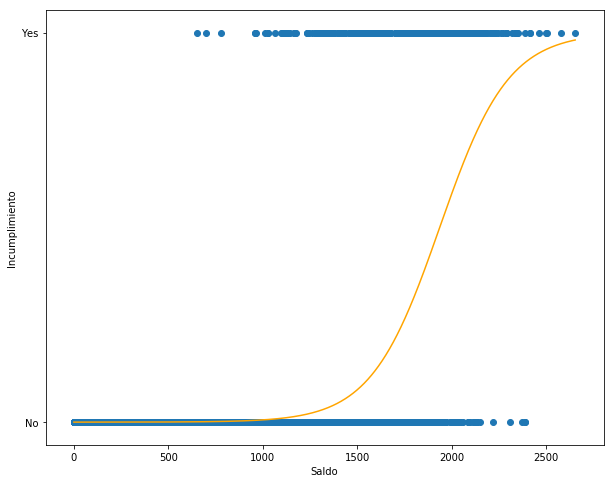

In [32]:
plot(prob[:,1],color='orange')
scatter(base_cred.Saldo,base_cred.Incumplimiento,)
xlabel('Saldo')
ylabel('Incumplimiento')
savefig('ajuste.pdf')

Podemos hacer un ajuste a secas

In [36]:
import seaborn as sns

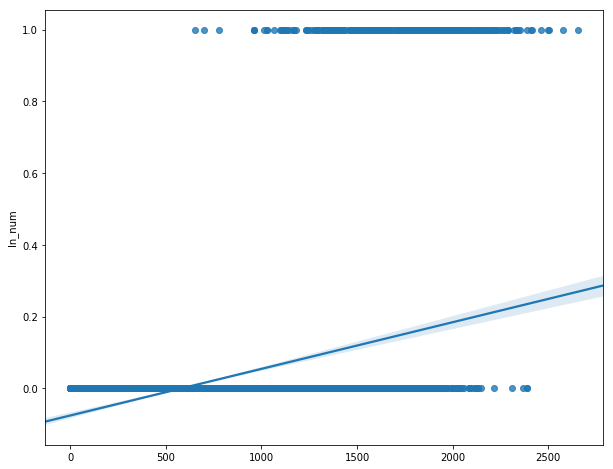

In [37]:
 sns.regplot(x_1,y)

In [39]:
clf.fit(x_1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
clf.coef_

array([[0.00549891]])

In [41]:
clf.intercept_

array([-10.65132036])

In [42]:
import statsmodels.api as sm

In [43]:
x_11=sm.add_constant(base_cred.Saldo)

In [45]:
import statsmodels.formula.api as smf

In [46]:
reg=smf.Logit(y,x_11).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [52]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 In_num   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Sep 2018   Pseudo R-squ.:                  0.4534
Time:                        20:44:18   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
Saldo          0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [53]:
x_2=sm.add_constant(base_cred[['Saldo','Ingreso','Est_num']])

In [55]:
reg2=smf.Logit(y,x_2).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [57]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 In_num   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Sep 2018   Pseudo R-squ.:                  0.4619
Time:                        20:52:53   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
Saldo          0.0057      0.000     24.737      0.000       0.005       0.006
Ingreso     3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
Est_num       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""